# Identify time of convergence of run trajectory for experiments with different start dates

In [1]:
import xarray as xr
import numpy as np
import cmocean
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import sys
sys.path.append('/home/users/birgal/')
from nemo_python_git.constants import cesm2_ensemble_members
# from nemo_python_git.constants import weddell_convect, ross_convect

#### Runs to analyze

In [2]:
base_dir = '/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/'
expdir1  = f'{base_dir}output/CESM2_3hwind_1920_t0_0955/'
expdir2a = f'{base_dir}output/CESM2_3hwind_1940_t0_0955/'
expdir2b = f'{base_dir}output/CESM2_3hwind_1940_t0_0955_ens1031/'
expdir3  = f'{base_dir}output/CESM2_3hwind_1960_t0_0955/'
expdir4  = f'{base_dir}output/CESM2_3hwind_1979_t0_0955/'

In [3]:
# load timeseries files for each of the runs to look at
ds_1920  = xr.open_dataset(f'{expdir1}timeseries0-gridT.nc')
ds_1940a = xr.open_dataset(f'{expdir2a}timeseries0-gridT.nc')
ds_1940b = xr.open_dataset(f'{expdir2b}timeseries0-gridT.nc')
ds_1960  = xr.open_dataset(f'{expdir3}timeseries0-gridT.nc')
ds_1979  = xr.open_dataset(f'{expdir4}timeseries0-gridT.nc')

In [4]:
region_names = ['amundsen_sea','bellingshausen_sea','pine_island', 'thwaites', 'getz','dotson_crosson','larsen','filchner_ronne','ross', 'amery', 'all']
var_names    = ['shelf_temp_btw_200_700m', 'shelf_salt_btw_200_700m', 'bwtemp', 'bwsalt', \
                 'cavity_temp', 'cavity_salt', 'shelf_temp', 'shelf_salt', 'cavity_thermocline', 'shelf_thermocline', 'thermocline']
colors = ["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728", "#9467bd", "#8c564b","#e377c2","#7f7f7f","#bcbd22","#17becf"]

### Continental shelf average temperature 200-700 m

Time series should be being calculated using nemo_python_git.timeseries functions:
"shelf_temp_btw_200_700m", "shelf_salt_btw_200_700m" 

Regions:
- Amundsen
- Ross
- Filchner-Ronne
- Bellingshausen Sea

In [5]:
def setup_timeseries_axes(regions=['amundsen_sea','ross','filchner_ronne','bellingshausen_sea']):
    fig, ax = plt.subplots(2,2, figsize=(16,7), dpi=100)

    for a, axis in enumerate(ax.ravel()):
        axis.set_title(regions[a])
        
    return fig, ax

In [6]:
def plot_timeseries(ax, var_name, ds, title='', regions=['amundsen_sea'], runid='', timevar='time_counter', color=None):

    for r, region in enumerate(regions):
        ax.ravel()[r].set_ylabel(title)
        varname = var_name.replace(regions[0], region)
        ax.ravel()[r].plot(ds[timevar], ds[varname], label=runid, color=color)
    
    return ax

In [7]:
regions = ['amundsen_sea','ross','filchner_ronne','bellingshausen_sea']
# regions = ['amundsen_sea']

var_titles = ['Shelf temperature, 200-700 m', 'Shelf salinity, 200-700 m','Bottom water temperature', 'Bottom water salinity', 'Thermocline']
var_names = [f'{regions[0]}_shelf_temp_btw_200_700m', f'{regions[0]}_shelf_salt_btw_200_700m', 
             f'{regions[0]}_bwtemp', f'{regions[0]}_bwsalt', f'{regions[0]}_thermocline']

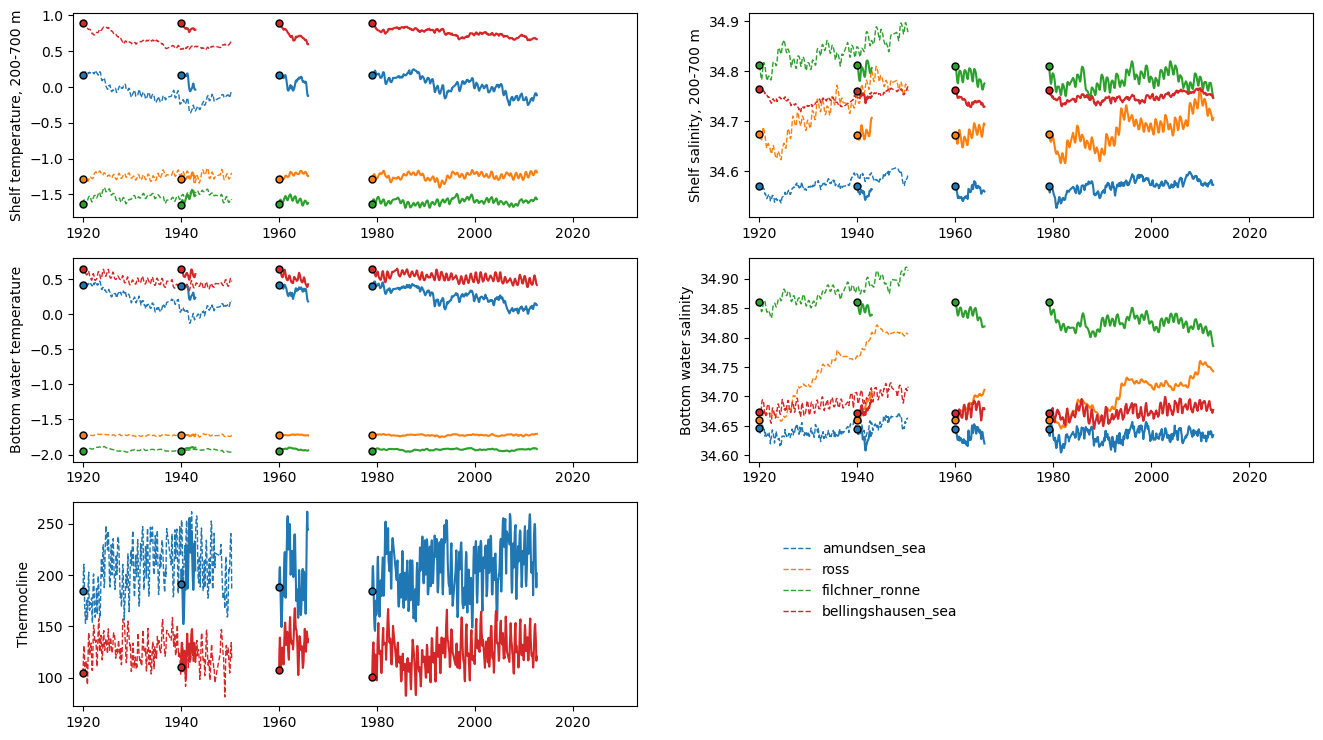

In [8]:
# create a new figure for each variable
fig, ax = plt.subplots(3,2, figsize=(16,9))
for v, var_name in enumerate(var_names):
    for r, region in enumerate(regions):
        varname = var_name.replace(regions[0], region)
        if (var_name==f'{regions[0]}_thermocline') and (region in ['ross','filchner_ronne']):
            continue
        else:
            ax.ravel()[v].plot(ds_1920['time_counter'], ds_1920[varname], label=region, color=colors[r], linestyle='--', linewidth=1)
            ax.ravel()[v].plot(ds_1940a['time_counter'], ds_1940a[varname], label='_nolegend_', color=colors[r])
            ax.ravel()[v].plot(ds_1960['time_counter'], ds_1960[varname], label='_nolegend_', color=colors[r])
            ax.ravel()[v].plot(ds_1979['time_counter'], ds_1979[varname], label='_nolegend_', color=colors[r])

        for ds in [ds_1920, ds_1940a, ds_1960, ds_1979]:
            ax.ravel()[v].scatter(ds['time_counter'][0], ds[varname][0], label='_nolegend_', color=colors[r], marker='.', s=100, edgecolor='k', zorder=3)
            
        ax.ravel()[v].set_ylabel(var_titles[v])
        ax.ravel()[v].set_xlim(datetime.date(1918,1,1),datetime.date(2032,12,31))

ax[2,1].axis('off')
ax[1,1].legend(loc=(0.05, -0.8), frameon=False)

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

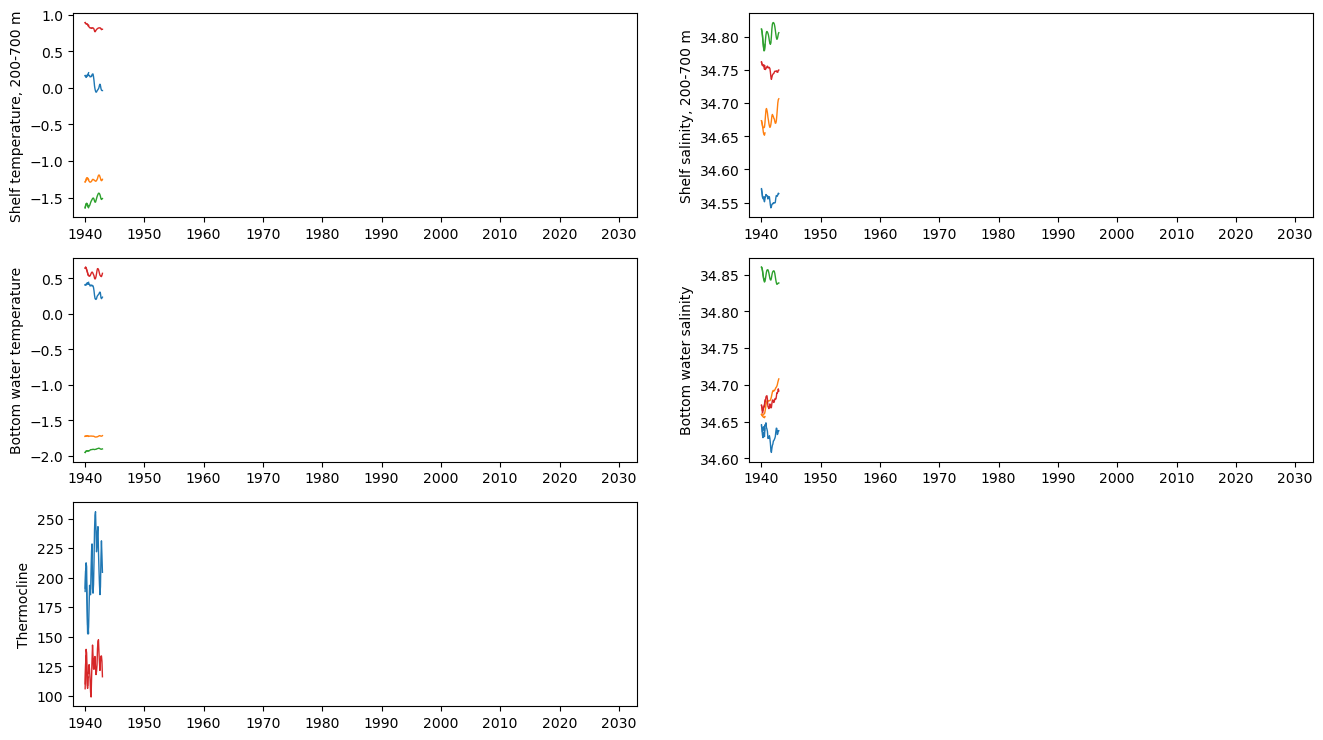

In [9]:
# create a new figure for each variable
fig, ax = plt.subplots(3,2, figsize=(16,9))
for v, var_name in enumerate(var_names):
    for r, region in enumerate(regions):
        varname = var_name.replace(regions[0], region)
        if (var_name==f'{regions[0]}_thermocline') and (region in ['ross','filchner_ronne']):
            continue
        else:
            ax.ravel()[v].plot(ds_1940a['time_counter'], ds_1940a[varname], color=colors[r], linewidth=1)
            ax.ravel()[v].plot(ds_1940b['time_counter'], ds_1940b[varname], color=colors[r], linewidth=1)
            
            
        ax.ravel()[v].set_ylabel(var_titles[v])
        ax.ravel()[v].set_xlim(datetime.date(1938,1,1),datetime.date(2032,12,31))

ax[2,1].axis('off')

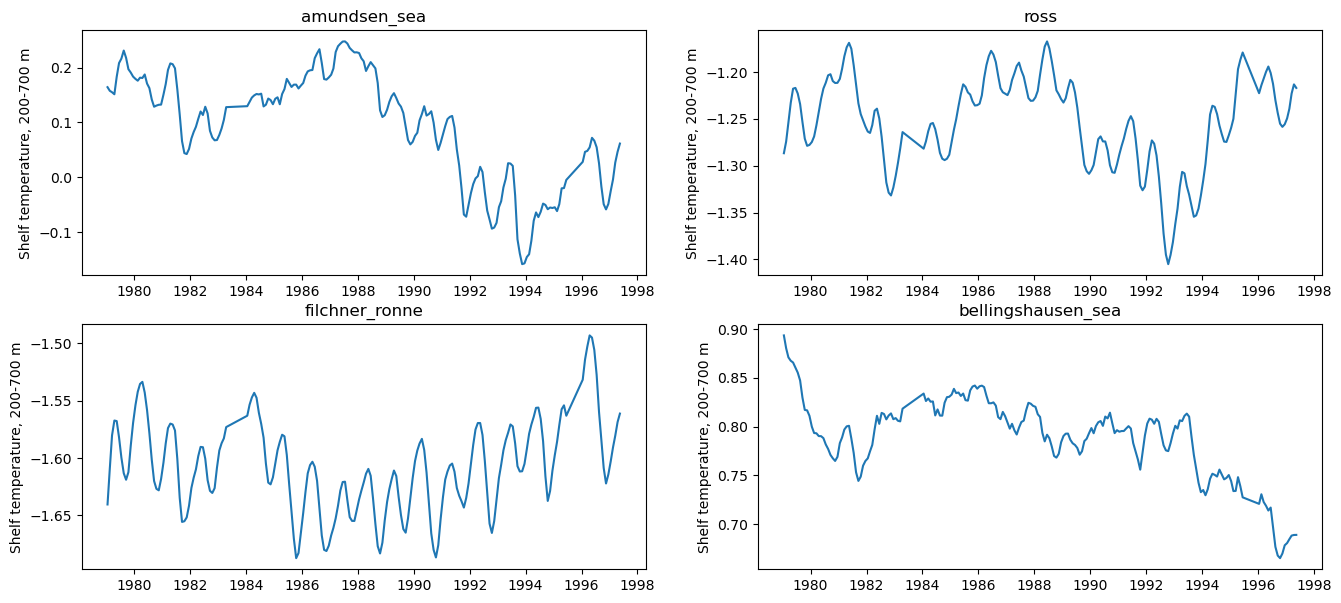

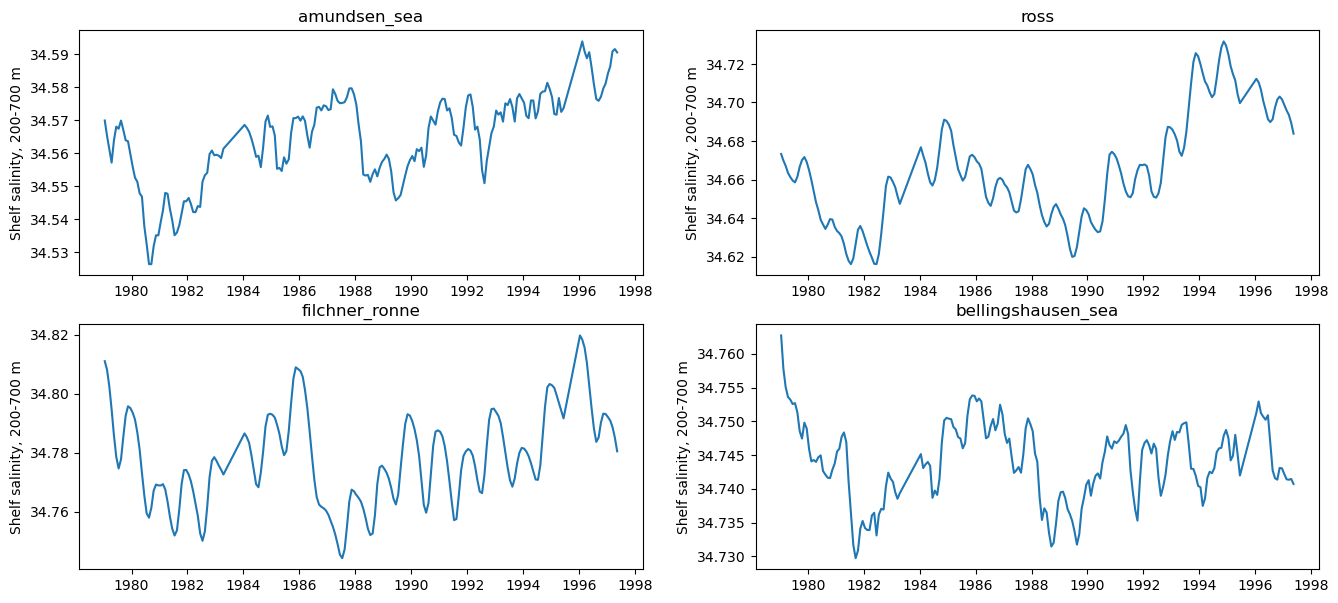

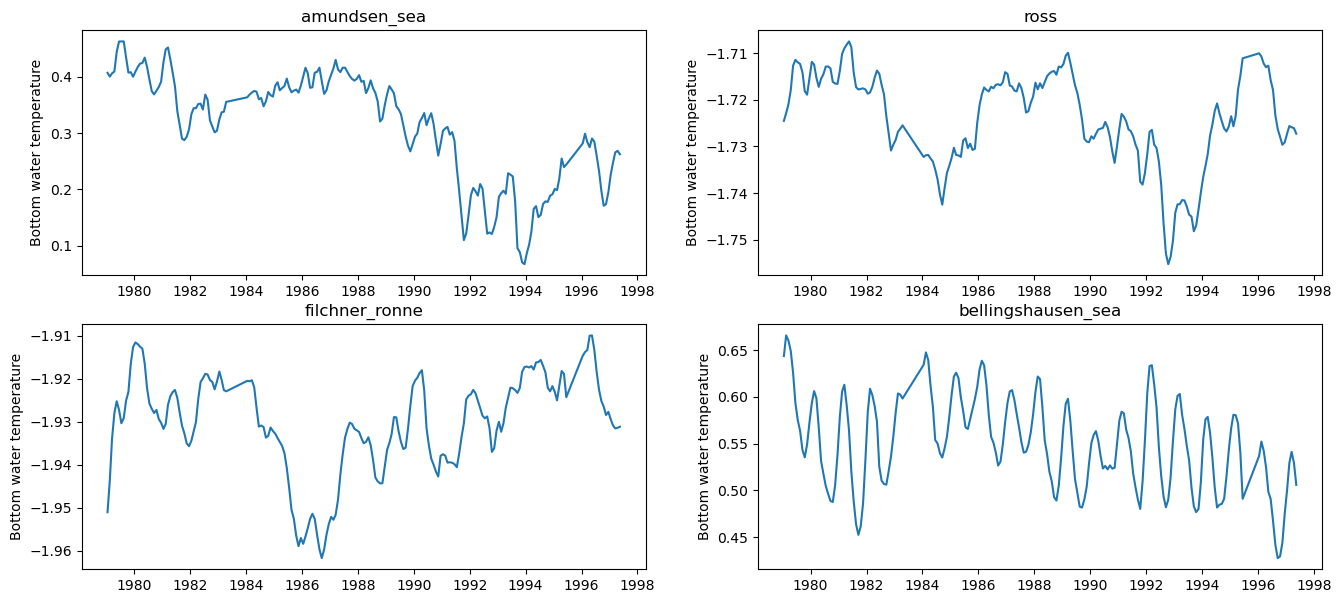

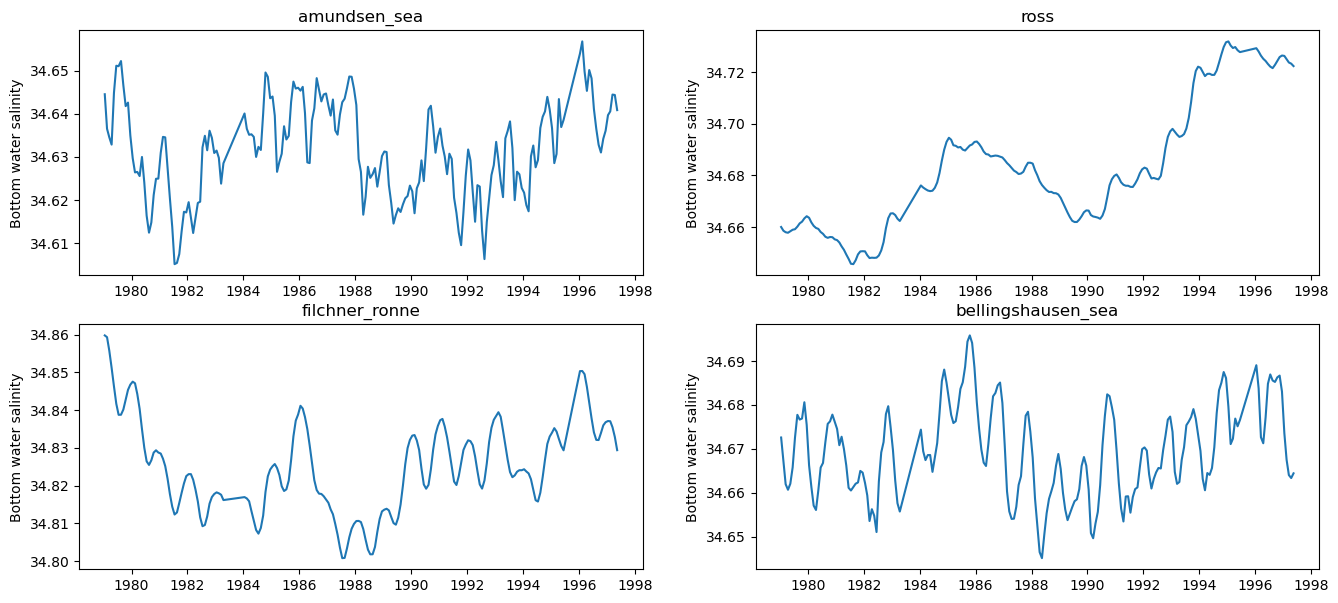

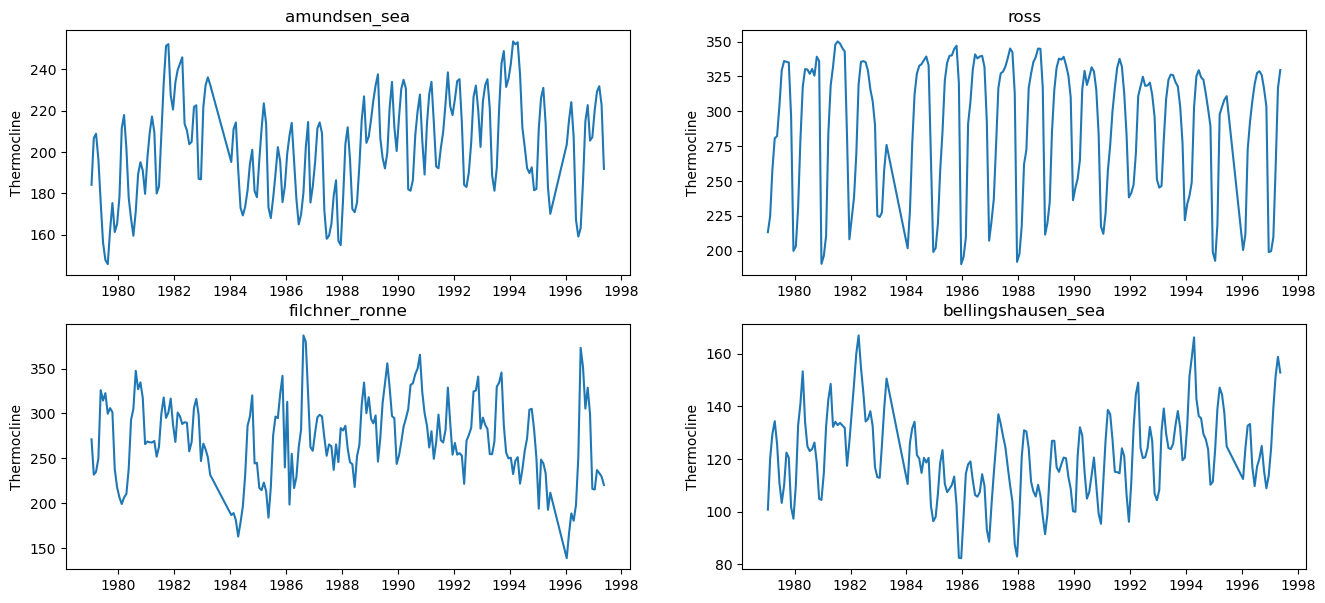

In [10]:
# create a new figure for each variable
for v, var_name in enumerate(var_names):
    
    fig, ax = setup_timeseries_axes(regions=regions)
    
    # ax = plot_timeseries(ax, var_name, ens1011, title=var_titles[v], regions=regions, runid='1011.001')
    ax = plot_timeseries(ax, var_name, ds_1979, title=var_titles[v], regions=regions, runid='')

    # ax[0,0].legend(frameon=False)
    # for axis in ax.ravel():
        # axis.set_xlim(ds1860.time_centered[0], ds1920.time_centered[-1])

### Sea ice area

Overall and separated by region

In [5]:
ens1011_ice  = xr.open_mfdataset(f'{ens1011_dir}files/*ice*', chunks='auto')
pre1011_ice  = xr.open_mfdataset(f'{pre1011_dir}files_spinup/*ice*')
pre1011_ice2 = xr.open_mfdataset(f'{pre1011_dir}files/*ice*')
piC_ice      = xr.open_mfdataset(f'{piC_dir}files/*ice*')

In [10]:
present_day_time_shifted = xr.concat([pre1011_ice.time_counter - pd.Timedelta(days=365*129+31), 
                                      pre1011_ice2.time_counter - pd.Timedelta(days=365*92+53)], dim='time_counter')

present_day_ice_shifted = xr.concat([(pre1011_ice.siconc*pre1011_ice.area).sum(dim=['x','y'])*1e-6, 
                                    (pre1011_ice2.siconc*pre1011_ice2.area).sum(dim=['x','y'])*1e-6], dim='time_counter')

In [7]:
ice_vars = ['sithic', 'sisali', 'siapnd', 'sitemp', 'sidive', 'sishea', 'qt_oce_ai', 'qt_atm_oi', \
            'qtr_ice_bot', 'qt_ice', 'qemp_ice', 'sfxice', 'area']

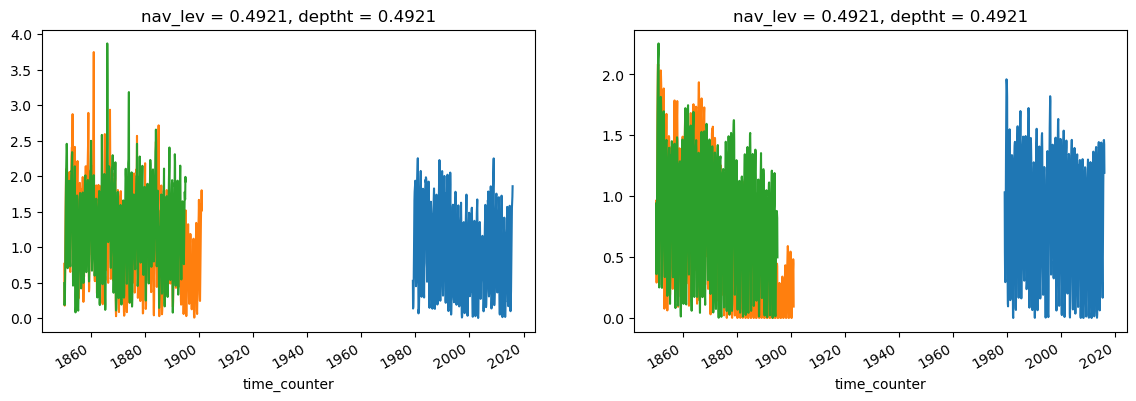

In [8]:
nemo_mesh_ds = xr.open_dataset('/gws/nopw/j04/anthrofail/birgal/NEMO_AIS/bathymetry/mesh_mask-20240305.nc').isel(time_counter=0, nav_lev=0)

var='sithic'

fig, ax = plt.subplots(1,2, figsize=(14,4), dpi=100)
for i, region in enumerate([weddell_convect, ross_convect]):
    for ds in [pre1011_ice, ens1011_ice, piC_ice]:
        nemo_ds    = ds.isel(x=region['x'], y=region['y']) 
        var_ocean  = xr.where(nemo_mesh_ds.isel(x=region['x'], y=region['y']).tmask==0, np.nan, nemo_ds[var])
        area_ocean = xr.where(nemo_mesh_ds.isel(x=region['x'], y=region['y']).tmask==0, np.nan, nemo_ds['area'])
        
        region_var = (var_ocean*area_ocean).sum(dim=['x','y'])/(area_ocean.sum(dim=['x','y']))
    
        region_var.plot(ax=ax[i])

Text(0, 0.5, 'Sea ice area (km2)')

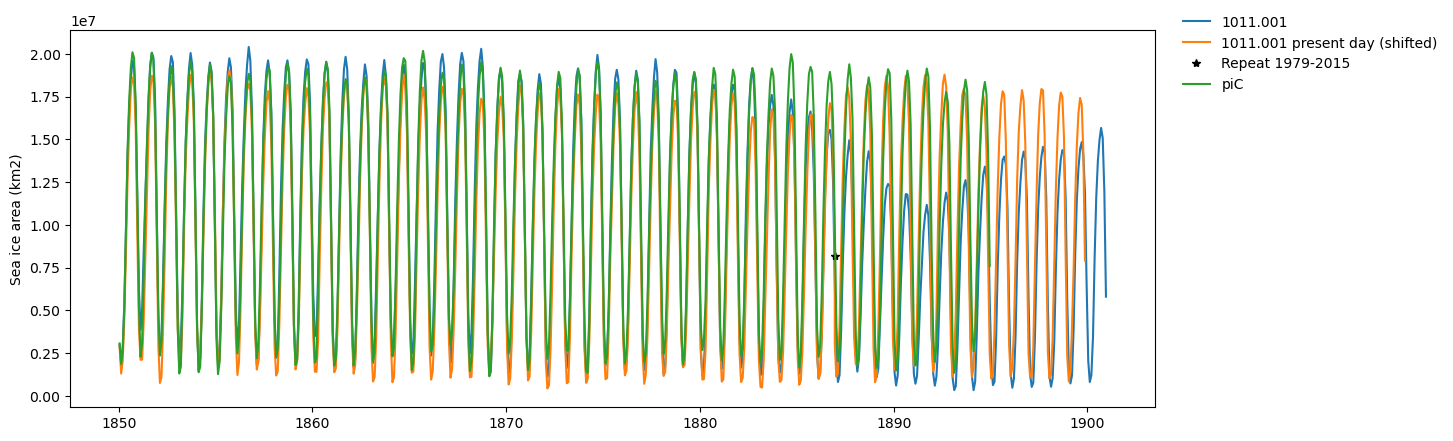

In [11]:
fig, ax = plt.subplots(1,1, figsize=(14,5), dpi=100)
ax.plot(ens1011_ice.time_counter, (ens1011_ice.siconc*ens1011_ice.area).sum(dim=['x','y'])*1e-6, label='1011.001')
ax.plot(present_day_time_shifted, present_day_ice_shifted, label='1011.001 present day (shifted)')
ax.plot(pre1011_ice.time_counter[-1] - pd.Timedelta(days=365*129+31), 
        ((pre1011_ice.siconc*pre1011_ice.area).sum(dim=['x','y'])*1e-6)[-1], '*k', label='Repeat 1979-2015')
ax.plot(piC_ice.time_counter , (piC_ice.siconc*piC_ice.area).sum(dim=['x','y'])*1e-6  , label='piC') 
ax.legend(frameon=False, loc=(1.02, 0.82))
ax.set_ylabel('Sea ice area (km2)')

Keep an eye out for whether the present day experiment starts convecting around the same time that the historical experiments starts convecting; in that case it would suggest it's likely a process that is gradually eroding the subsurface salinity rather than a process specific to the timing. What can be eroding the subsurface salinity? Could be from wind pattern differences. Or from 

Text(0, 0.5, 'Sea ice area (km2)')

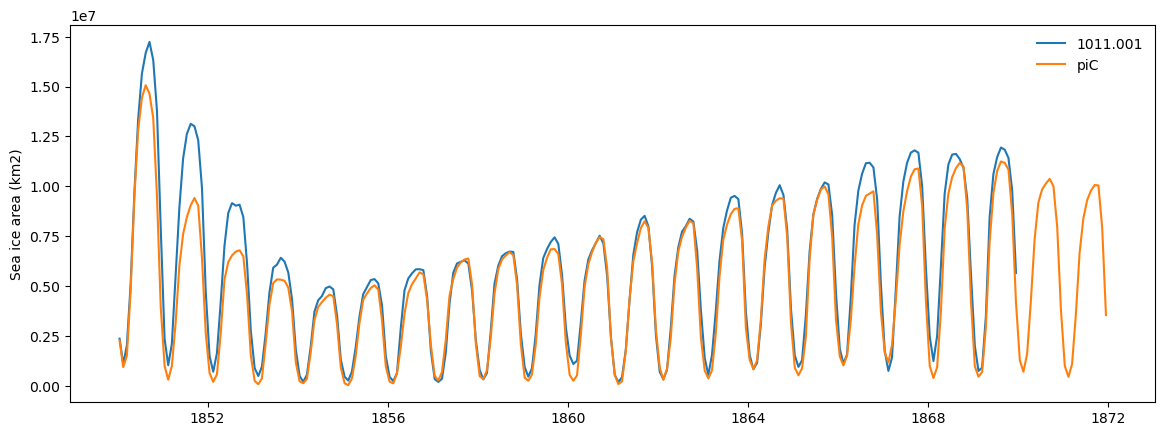

In [8]:
fig, ax = plt.subplots(1,1, figsize=(14,5), dpi=100)
ax.plot(ens1011_ice.time_counter, (ens1011_ice.siconc*ens1011_ice.area).sum(dim=['x','y'])*1e-6, label='1011.001')
ax.plot(piC_ice.time_counter, (piC_ice.siconc*piC_ice.area).sum(dim=['x','y'])*1e-6, label='piC') 
ax.legend(frameon=False)
ax.set_ylabel('Sea ice area (km2)')